In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
titanic = pd.read_csv("train.csv")

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preprocessing

In [6]:
def prefix_name(n):
    pref = n.split()[1]
    popular_prefix = ['Mr.', 'Mrs.', 'Miss.', 'Master.']
    if pref[-1] != '.' or pref not in popular_prefix:
        pref = 'Other'
    return pref

In [7]:
titanic['Prefix'] = titanic['Name'].apply(prefix_name)

In [37]:
titanic['Prefix'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Other'], dtype=object)

In [8]:
titanic.drop('Name', axis=1, inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True)
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.drop('Embarked', axis=1, inplace=True)

In [12]:
age_mean = titanic['Age'].mean()
titanic['Age'] = titanic['Age'].fillna(value=age_mean)

In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             418 non-null    float64
 1   Fare            418 non-null    float64
 2   SibSp_0         418 non-null    uint8  
 3   SibSp_1         418 non-null    uint8  
 4   SibSp_2         418 non-null    uint8  
 5   SibSp_3         418 non-null    uint8  
 6   SibSp_4         418 non-null    uint8  
 7   SibSp_5         418 non-null    uint8  
 8   SibSp_8         418 non-null    uint8  
 9   Sex_female      418 non-null    uint8  
 10  Sex_male        418 non-null    uint8  
 11  Pclass_1        418 non-null    uint8  
 12  Pclass_2        418 non-null    uint8  
 13  Pclass_3        418 non-null    uint8  
 14  Parch_0         418 non-null    uint8  
 15  Parch_1         418 non-null    uint8  
 16  Parch_2         418 non-null    uint8  
 17  Parch_3         418 non-null    uin

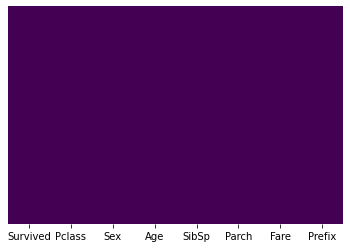

In [21]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [161]:
test = pd.read_csv('test.csv')

In [162]:
test_ids = test['PassengerId']

In [134]:
test['Prefix'] = test['Name'].apply(prefix_name)

In [135]:
test.drop('Name', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

In [136]:
test['Age'] = test['Age'].fillna(value=age_mean)

In [137]:
fare_mean = titanic['Fare'].mean()
test['Fare'] = test['Fare'].fillna(value=fare_mean)

In [138]:
test = pd.get_dummies(data=test, columns=['SibSp','Sex','Pclass','Parch','Prefix'])

In [140]:
test = test.reindex(columns = titanic.columns, fill_value=0)

In [141]:
test.drop('Survived', inplace=True, axis=1)

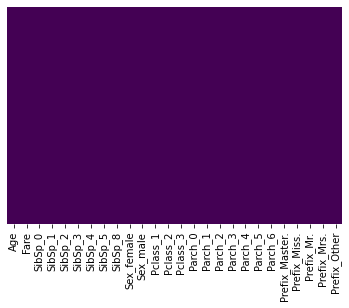

In [142]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## EDA

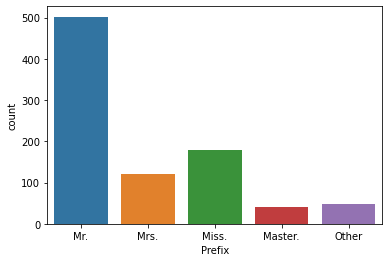

In [22]:
sns.countplot(data=titanic, x='Prefix')

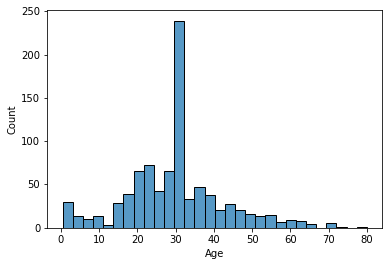

In [23]:
sns.histplot(data=titanic, x='Age')

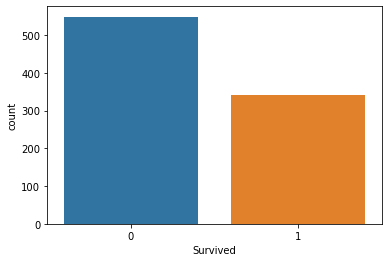

In [24]:
sns.countplot(data=titanic, x='Survived')

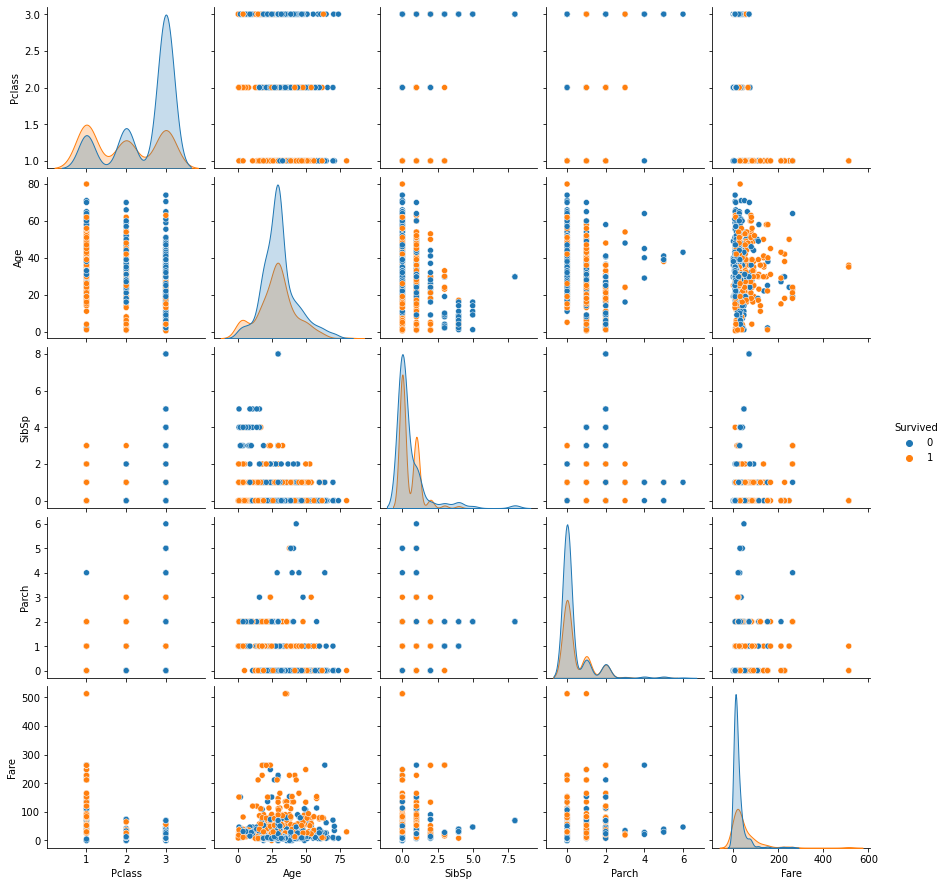

In [25]:
sns.pairplot(titanic, hue='Survived')

In [29]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [30]:
titanic.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

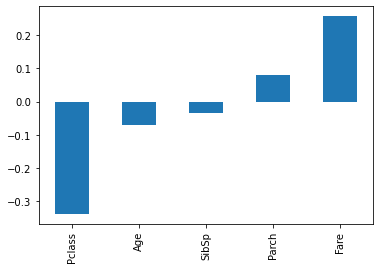

In [32]:
titanic.corr()['Survived'].sort_values()[:-1].plot(kind='bar')

## First try

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
ordenc = OrdinalEncoder()

In [38]:
ordenc.fit(titanic[['Sex','Ticket','Cabin', 'Embarked', 'prefix']])

OrdinalEncoder()

In [39]:
titanic[['Sex','Ticket','Cabin', 'Embarked', 'prefix']] = ordenc.fit_transform(
    titanic[['Sex','Ticket','Cabin', 'Embarked', 'prefix']])

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,523.0,7.2500,NaN,2.0,10.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,596.0,71.2833,81.0,0.0,11.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,669.0,7.9250,NaN,2.0,7.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,49.0,53.1000,55.0,2.0,11.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,472.0,8.0500,NaN,2.0,10.0


In [46]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,204.000000,889.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,76.000000,1.535433,9.347924
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,200.850657,49.693429,42.233225,0.792088,1.860936
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,158.500000,7.910400,40.000000,1.000000,7.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,75.000000,2.000000,10.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,519.500000,31.000000,113.250000,2.000000,10.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000,14.000000


In [66]:
mode_embarked = titanic['Embarked'].mode()
titanic['Embarked'].fillna(value=0, inplace=True)

In [67]:
# titanic[titanic['Embarked'].isna()]['Embarked'] = mode_embarked
# titanic[titanic['Embarked'].isna()]

In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    float64
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    float64
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    float64
 10  prefix       891 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 76.7 KB


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
baseline = pd.read_csv('gender_submission.csv')

In [27]:
tree = DecisionTreeClassifier()

In [69]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [70]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
predictions = tree.predict(X_test)

In [72]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[138  33]
 [ 34  63]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       171
           1       0.66      0.65      0.65        97

    accuracy                           0.75       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.75      0.75      0.75       268



In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
rf = RandomForestClassifier()

In [78]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[150  17]
 [ 27  74]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       167
           1       0.81      0.73      0.77       101

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268



In [80]:
baseline

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [82]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
test['prefix'] = test['Name'].apply(prefix_name)
test[['Sex','Ticket','Cabin', 'Embarked', 'prefix']] = ordenc.fit_transform(
    test[['Sex','Ticket','Cabin', 'Embarked', 'prefix']])
test.drop('Name', axis=1, inplace=True)
test['Age'].fillna(value=age_mean, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test['Embarked'].fillna(value=0, inplace=True)

In [87]:
mean_fare = test['Fare'].mean()
test['Fare'].fillna(value=mean_fare, inplace=True)

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    float64
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    float64
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    float64
 9   prefix       418 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 32.8 KB


In [89]:
my_submit = rf.predict(test)

In [104]:
submit = pd.DataFrame(my_submit, columns=['Survived'], index=test['PassengerId'])

In [105]:
submit.reset_index(inplace=True)

In [106]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
submit.to_csv('submit.csv')

This ended my first try

## Second try

In [14]:
titanic = pd.get_dummies(data=titanic, columns=['SibSp','Sex','Pclass','Parch','Embarked','prefix'])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg = LogisticRegression()

In [23]:
X = titanic.drop(['Survived', 'PassengerId'], axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lg.fit(X_train, y_train)

predictions = lg.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[157  22]
 [ 18  71]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       179
           1       0.76      0.80      0.78        89

    accuracy                           0.85       268
   macro avg       0.83      0.84      0.83       268
weighted avg       0.85      0.85      0.85       268



C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Ttying to add some noise :)

In [51]:
size = len(predictions)
# predictions = 
def add_noise(l, coin=0.1):
    noise = np.random.binomial(n=1,p=coin)
    if noise:
        return np.abs(1-l)
    else:
        return l
v_add_noise = np.vectorize(add_noise)    

print(np.sum(np.abs(np.subtract(predictions,v_add_noise(predictions))))/size)

0.08208955223880597


noisy_predictions = v_add_noise(predictions)

In [53]:
print(confusion_matrix(y_test, noisy_predictions))
print(classification_report(y_test, noisy_predictions))

[[144  35]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       179
           1       0.65      0.72      0.68        89

    accuracy                           0.78       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.78      0.78      0.78       268



Well nevermind :)

### Scaling the data

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler().fit(X_train)

In [56]:
X_scaled = scaler.transform(X_train)

In [57]:
lg.fit(X_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
predictions = lg.predict(X_test_scaled)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[155  24]
 [ 21  68]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       179
           1       0.74      0.76      0.75        89

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



### Now put it all together

In [63]:
test['prefix'] = test['Name'].apply(prefix_name)
test.drop('Name', axis=1, inplace=True)
test['Age'].fillna(value=age_mean, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test['Embarked'].fillna(value=0, inplace=True)
mean_fare = test['Fare'].mean()
test['Fare'].fillna(value=mean_fare, inplace=True)

test = pd.get_dummies(data=test, columns=['SibSp','Sex','Pclass','Parch','Embarked','prefix'])

In [65]:
test.drop('Ticket', axis=1, inplace=True)

In [66]:
test.head()

,PassengerId,Age,Fare,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,...,Embarked_S,prefix_Col.,prefix_Dr.,prefix_Master.,prefix_Miss.,prefix_Mr.,prefix_Mrs.,prefix_Ms.,prefix_None,prefix_Rev.
0,892,34.5,7.8292,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,893,47.0,7.0000,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,894,62.0,9.6875,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,895,27.0,8.6625,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,896,22.0,12.2875,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
scaler = StandardScaler().fit(X_train)

## Third try

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
cat_feats = ['Sex', 'prefix']
titanic = pd.get_dummies(titanic,columns=cat_feats,drop_first=True)

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Sex_male      891 non-null    uint8  
 7   prefix_Miss.  891 non-null    uint8  
 8   prefix_Mr.    891 non-null    uint8  
 9   prefix_Mrs.   891 non-null    uint8  
 10  prefix_Other  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [49]:
depths = range(1,20)
accuracies = []
for d in depths:
#     dt = DecisionTreeClassifier(max_depth=d)
    dt = RandomForestClassifier(max_depth=d)

    X = titanic.drop('Survived', axis=1)
    y = titanic['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    dt.fit(X_train, y_train)

    predictions = dt.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

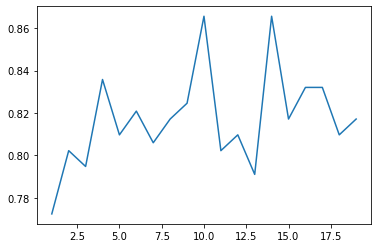

In [50]:
plt.plot(depths, accuracies)

In [61]:
d = 5

# dt = DecisionTreeClassifier(max_depth=d)
dt = RandomForestClassifier(max_depth=d)

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.835820895522388
[[148  23]
 [ 21  76]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       171
           1       0.77      0.78      0.78        97

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



And now for the test

In [64]:
test['prefix'] = test['Name'].apply(prefix_name)
test.drop('Name', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
# test.drop('PassengerId', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)
test['Age'].fillna(value=age_mean, inplace=True)
test = pd.get_dummies(test,columns=cat_feats,drop_first=True)

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Fare          417 non-null    float64
 6   Sex_male      418 non-null    uint8  
 7   prefix_Miss.  418 non-null    uint8  
 8   prefix_Mr.    418 non-null    uint8  
 9   prefix_Mrs.   418 non-null    uint8  
 10  prefix_Other  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.8 KB


In [66]:
fare_mean = titanic['Fare'].mean()
test['Fare'].fillna(value=fare_mean, inplace=True)
new_test = test.drop('PassengerId', axis=1)

In [67]:
submission = dt.predict(new_test)

In [68]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,prefix_Miss.,prefix_Mr.,prefix_Mrs.,prefix_Other
0,892,3,34.5,0,0,7.8292,1,0,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,0,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,0
4,896,3,22.0,1,1,12.2875,0,0,0,1,0


In [69]:
submit = pd.DataFrame(submission, columns=['Survived'], index=test['PassengerId'])

In [70]:
submit.reset_index(inplace=True)

In [71]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
submit.to_csv('submit5.csv')

## Fourth try

In [13]:
from sklearn.svm import SVC

In [15]:
cat_feats = ['Sex', 'Prefix']
titanic = pd.get_dummies(titanic,columns=cat_feats,drop_first=True)

In [19]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [20]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.616 total time=   0.3s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.616 total time=   0.3s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.616 total time=   0.3s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.621 total time=   0.3s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.621 total time=   0.3s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.616 total time=   0.3s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.616 total time=   0.2s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.616 total time=   0.3s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.621 total time=   0.3s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.621 total time=   0.2s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.696 total time=   0.3s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [21]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [22]:
predictions = grid.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7947761194029851
[[137  27]
 [ 28  76]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       164
           1       0.74      0.73      0.73       104

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



### And the test

In [23]:
test['Prefix'] = test['Name'].apply(prefix_name)
test.drop('Name', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
# test.drop('PassengerId', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)
test['Age'].fillna(value=age_mean, inplace=True)
test = pd.get_dummies(test,columns=cat_feats,drop_first=True)

In [24]:
fare_mean = titanic['Fare'].mean()
test['Fare'].fillna(value=fare_mean, inplace=True)
new_test = test.drop('PassengerId', axis=1)

In [25]:
submission = grid.predict(new_test)

In [26]:
submit = pd.DataFrame(submission, columns=['Survived'], index=test['PassengerId'])

In [27]:
submit.reset_index(inplace=True)

In [28]:
submit.to_csv('submit6.csv')

# Fifth

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
cat_feats = ['Sex', 'Prefix']
titanic = pd.get_dummies(titanic,columns=cat_feats,drop_first=True)

In [62]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

accuracies = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, predictions))

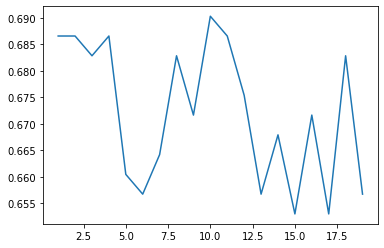

In [63]:
plt.plot(range(1,20), accuracies)

In [65]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

k=10

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6828358208955224
[[141  23]
 [ 62  42]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       164
           1       0.65      0.40      0.50       104

    accuracy                           0.68       268
   macro avg       0.67      0.63      0.63       268
weighted avg       0.68      0.68      0.66       268



This is too low to go on :|

## Neural Networks!

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.layers import Dropout

from sklearn.metrics import classification_report,confusion_matrix

In [43]:
titanic = pd.get_dummies(data=titanic, columns=['SibSp','Sex','Pclass','Parch','Prefix'])

In [44]:
titanic.head()

,Survived,Age,Fare,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Prefix_Master.,Prefix_Miss.,Prefix_Mr.,Prefix_Mrs.,Prefix_Other
0,0,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,38.0,71.2833,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
X = titanic.drop('Survived',axis=1).values
y = titanic['Survived'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [47]:
scaler = MinMaxScaler()

In [71]:
scaler.fit(X_train)

MinMaxScaler()

In [72]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
test = scaler.transform(test)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [82]:
model = Sequential()
model.add(Dense(units=26,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=13,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=13,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=13,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [84]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
21/21 [==============================] - 1s 11ms/step - loss: 0.7337 - val_loss: 0.6786
Epoch 2/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6989 - val_loss: 0.6715
Epoch 3/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6746 - val_loss: 0.6654
Epoch 4/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6688 - val_loss: 0.6562
Epoch 5/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6777 - val_loss: 0.6422
Epoch 6/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6589 - val_loss: 0.6273
Epoch 7/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6509 - val_loss: 0.6151
Epoch 8/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6179 - val_loss: 0.5857
Epoch 9/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6217 - val_loss: 0.5624
Epoch 10/600
21/21 [==============================] - 0s 3ms/step - loss: 0.6066 - val_loss: 0.5454
Epoch 11

21/21 [==============================] - 0s 3ms/step - loss: 0.4537 - val_loss: 0.3841
Epoch 84/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4480 - val_loss: 0.3816
Epoch 85/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4611 - val_loss: 0.3815
Epoch 86/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4590 - val_loss: 0.3814
Epoch 87/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4624 - val_loss: 0.3815
Epoch 88/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4519 - val_loss: 0.3812
Epoch 89/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4507 - val_loss: 0.3805
Epoch 90/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4587 - val_loss: 0.3807
Epoch 91/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4583 - val_loss: 0.3776
Epoch 92/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4599 - val_loss: 0.3821
Epoch 93/600


21/21 [==============================] - 0s 3ms/step - loss: 0.4320 - val_loss: 0.3693
Epoch 165/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4331 - val_loss: 0.3711
Epoch 166/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4243 - val_loss: 0.3669
Epoch 167/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4387 - val_loss: 0.3661
Epoch 168/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4368 - val_loss: 0.3688
Epoch 169/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4533 - val_loss: 0.3714
Epoch 170/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4450 - val_loss: 0.3714
Epoch 171/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4191 - val_loss: 0.3677
Epoch 172/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4487 - val_loss: 0.3677
Epoch 173/600
21/21 [==============================] - 0s 3ms/step - loss: 0.4250 - val_loss: 0.3677
Epoc

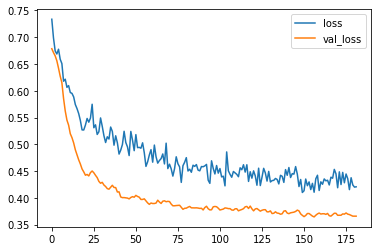

In [85]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [93]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

7/7 [==============================] - 0s 1ms/step


In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       134
           1       0.76      0.83      0.79        89

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.82       223
weighted avg       0.83      0.83      0.83       223



In [96]:
print(confusion_matrix(y_test,predictions))

[[110  24]
 [ 15  74]]


In [152]:
test_predictions = (model.predict(test) > 0.5).astype("int32")

14/14 [==============================] - 0s 1ms/step


In [160]:
test_predictions.shape

(418, 1)

In [164]:
submit = pd.DataFrame(test_predictions.reshape((418,)), columns=['Survived'], index=test_ids)
# pd.DataFrame(test_predictions.reshape((418,)), columns=['Survived'], index=test_ids)
submit
# test.shape

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,1
...,...
1305,1
1306,1
1307,0


In [165]:
submit.reset_index(inplace=True)

In [166]:
submit.to_csv('submit7.csv')